In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

The normalization function takes each row to unit length. The init_V generate a random orthonormal matrix V.

In [2]:
 def centralize(X):
    
    t = np.mean(X,axis=0)
    #t = t.reshape((len(t),1))
    z = X-t
    
    return z    

def init_V(n_features,num):
    
    V = np.random.randn(n_features,num)
    V,_ = np.linalg.qr(V, mode='reduced')#make it orthonormal

    return V

In [3]:
from sklearn.decomposition import PCA

def true_pca(x,n_features,num):
    
    pca = PCA(n_components=(n_features))
    pca.fit(x)
    
    return pca

In [4]:
import numpy as np

def oja1(X, V, eta=0.01):
    
    t,length = X.shape
    
    for i in range(t):
        x = X[i,:]
        V += eta*np.outer(x,x)@V #step 1
        V,_ = np.linalg.qr(V, mode='reduced') #step 2 and step 3
        
    return V

In [5]:
x = tf.keras.datasets.cifar10.load_data()[0][0]
x = x.reshape(-1,32*32*3)
x = x/255
n_features = 32*32*3
num = 4
xn = centralize(x)

#Built-in PCA
pca_obj = true_pca(xn,n_features,num)
pca = pca_obj.components_.T[:,:num]

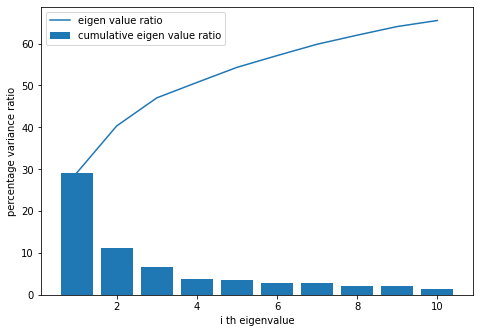

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(range(1,11)),pca_obj.explained_variance_ratio_[:10]*100)
plt.plot(list(range(1,11)),[sum(pca_obj.explained_variance_ratio_[:i+1])*100 for i in range(10)])
plt.ylabel('percentage variance ratio')
plt.xlabel('i th eigenvalue')
plt.legend(['eigen value ratio','cumulative eigen value ratio'])
plt.show()

Learning rate keeps to 0.001

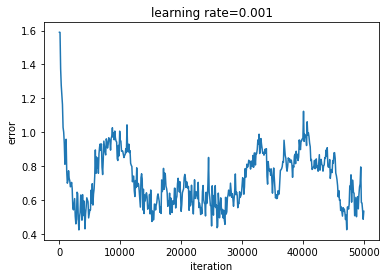

In [7]:
#Oja's method
V = init_V(n_features,num)
error_list=[np.linalg.norm(np.abs(pca)-np.abs(V))]

for i in range(500):
        
    V = oja1(xn[i*100:(i+1)*100,:], V ,0.001)
    error_list.append(np.linalg.norm(np.abs(pca)-np.abs(V)))

plt.plot([i*100 for i in range(501)],error_list)
plt.title('learning rate=0.001')
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()

Learning rate keeps to 0.0001

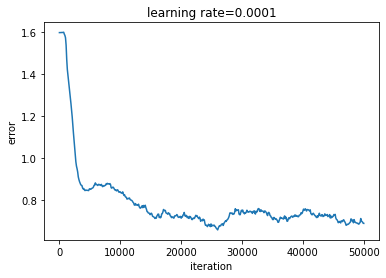

In [8]:
#Oja's method
V = init_V(n_features,num)
error_list=[np.linalg.norm(np.abs(pca)-np.abs(V))]

for i in range(500):
        
    V = oja1(xn[i*100:(i+1)*100,:], V ,0.0001)
    error_list.append(np.linalg.norm(np.abs(pca)-np.abs(V)))
    
plt.plot([i*100 for i in range(501)],error_list)
plt.title('learning rate=0.0001')
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()

Using combined learning rate method

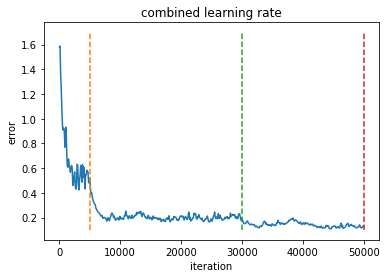

In [10]:
#Oja's method
V = init_V(n_features,num)
error_list=[np.linalg.norm(np.abs(pca)-np.abs(V))]

for i in range(50):
        
    V = oja1(xn[i*100:(i+1)*100,:], V ,0.001)
    error_list.append(np.linalg.norm(np.abs(pca)-np.abs(V)))

for i in range(250):
        
    V = oja1(xn[i*100:(i+1)*100,:], V ,0.0001)
    error_list.append(np.linalg.norm(np.abs(pca)-np.abs(V)))

for i in range(200):
        
    V = oja1(xn[i*100:(i+1)*100,:], V ,0.00005)
    error_list.append(np.linalg.norm(np.abs(pca)-np.abs(V)))

plt.plot([i*100 for i in range(501)],error_list)
plt.plot([5000,5000],[0.1,1.7],'--')
plt.plot([30000,30000],[0.1,1.7],'--')
plt.plot([50000,50000],[0.1,1.7],'--')
plt.title('combined learning rate')
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()